In [1]:
import pandas as pd

In [ ]:

# Business Understanding:
# O objetivo deste projeto é realizar uma análise preditiva utilizando o banco de dados de um condomínio de médio porte.
# Serão ilustradas análises simples, como previsão orçamentária mensal, identificação de padrões de inadimplência e simulação de cenários.
# O intuito é auxiliar na tomada de decisão financeira, reduzir a inadimplência por meio da identificação antecipada de risco,
# além de otimizar a previsão orçamentária e o uso do orçamento.
# O banco de dados utilizado é fiel à realidade de um condomínio, porém, para proteger os dados dos moradores,
# algumas colunas e valores foram alterados, tornando-o fictício, mas mantendo características de um condomínio real,
# incluindo informações sobre moradores, inadimplência, previsão orçamentária e uso do orçamento.
# O intuito da análise é auxiliar, síndicos, administradores condominiais e conselhos fiscais na tomada de decisão financeira
#Granularidade do dataset, cada linha representa o registro mensal de uma unidade(apartamento ou loja)

In [33]:
predio = pd.read_csv("condominio.csv")
predio.head(5)

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0
1,2020-01-01,Apt002,apartamento,55,619.22,True,0,619.22,33048.316687,0.0
2,2020-01-01,Apt003,apartamento,39,568.89,True,0,568.89,33048.316687,0.0
3,2020-01-01,Apt004,apartamento,39,572.01,True,0,572.01,33048.316687,0.0
4,2020-01-01,Apt005,apartamento,39,575.91,False,30,243.17,33048.316687,0.0


In [20]:
#identificando colunas possíveis index
predio.columns

Index(['data', 'unidade_id', 'tipo_unidade', 'metragem', 'valor_cota', 'pagou',
       'dias_atraso', 'valor_pago', 'despesa_total', 'obra_extraordinaria'],
      dtype='object')

In [7]:
predio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data                 20460 non-null  object 
 1   unidade_id           20460 non-null  object 
 2   tipo_unidade         20460 non-null  object 
 3   metragem             20460 non-null  int64  
 4   valor_cota           20460 non-null  float64
 5   pagou                20460 non-null  bool   
 6   dias_atraso          20460 non-null  int64  
 7   valor_pago           20460 non-null  float64
 8   despesa_total        20460 non-null  float64
 9   obra_extraordinaria  20460 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 1.4+ MB


In [19]:
#tamanho do dataset condominio
predio.shape

(20460, 10)

In [18]:
## descrição estatística basica das variaveis numéricas 
predio.describe()

,metragem,valor_cota,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
count,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000
mean,40.263930,592.741355,2.828055,574.635664,34636.468926,5126.965996
std,6.575741,143.836841,10.192461,153.703353,5778.774352,11315.212579
min,20.000000,464.100000,0.000000,194.970000,25553.998702,0.000000
25%,39.000000,513.367500,0.000000,504.332500,29234.471499,0.000000
50%,39.000000,547.670000,0.000000,541.980000,35187.251581,0.000000
75%,39.000000,583.455000,0.000000,581.032500,39099.060889,0.000000
max,60.000000,1099.770000,60.000000,1099.770000,44714.364423,36955.394564


In [37]:
## verificando se existem valores nulos
predio.isnull().sum()


data                   0
unidade_id             0
tipo_unidade           0
metragem               0
valor_cota             0
pagou                  0
dias_atraso            0
valor_pago             0
despesa_total          0
obra_extraordinaria    0
dtype: int64

In [22]:
predio.head(1)

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0


In [32]:
## quantos tipos de unidades existem no predio
predio['tipo_unidade'].unique()

array(['apartamento', 'loja'], dtype=object)

In [23]:
#### Verificando os tipos de dados
predio.dtypes

data                    object
unidade_id              object
tipo_unidade            object
metragem                 int64
valor_cota             float64
pagou                     bool
dias_atraso              int64
valor_pago             float64
despesa_total          float64
obra_extraordinaria    float64
dtype: object

In [35]:

print(f'Quantidade de registros: {predio.shape[0]}')
print(f'Quantidade de unidades: {predio["unidade_id"].nunique()}')
print(f'Periodo dos dados: {pd.to_datetime(predio["data"]).min()} a {pd.to_datetime(predio["data"]).max()}')


Quantidade de registros: 20460
Quantidade de unidades: 341
Periodo dos dados: 2020-01-01 00:00:00 a 2024-12-01 00:00:00


In [42]:
### entendendo a inadimplencia
predio['pagou'].mean
predio.groupby("tipo_unidade")["pagou"].mean()

tipo_unidade
apartamento    0.906341
loja           0.904924
Name: pagou, dtype: float64

In [78]:
### mostrando somente os inadimplentes 


inadimplencia = predio.groupby("unidade_id")["pagou"].mean()
inadimplentes_costumazes = inadimplencia[inadimplencia < 0.7]

inadimplentes_costumazes



unidade_id
Apt005     0.133333
Apt022     0.100000
Apt050     0.183333
Apt056     0.283333
Apt063     0.033333
Apt079     0.166667
Apt098     0.116667
Apt101     0.133333
Apt103     0.083333
Apt133     0.200000
Apt150     0.166667
Apt215     0.150000
Apt216     0.233333
Apt230     0.233333
Apt237     0.083333
Apt241     0.083333
Apt251     0.166667
Apt277     0.150000
Apt284     0.133333
Apt285     0.116667
Loja009    0.133333
Loja024    0.183333
Loja028    0.150000
Name: pagou, dtype: float64

<Axes: xlabel='ano_mes'>

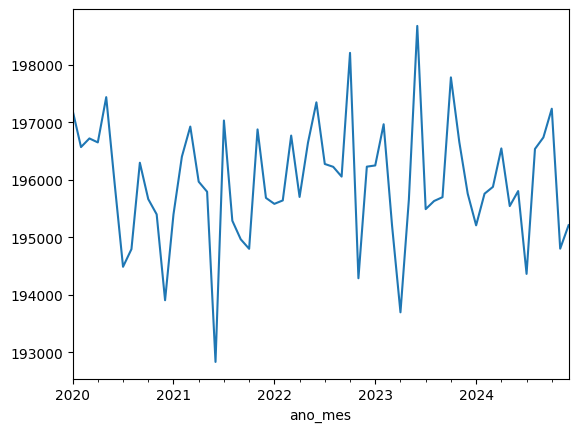

In [ ]:
'ano_mes"] = pd.to_datetime(df["data"])
df.groupby("ano_mes")[["valor_pago", "despesa_total"]].sum().plot()



